In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class Die():
    '''
    purpose: creates a die object with various faces, face weights, and number of rolls and returns the rolled die object
    inputs: array of faces for the die object, weight to change/new weight, number of times die object is rolled
    outputs: die objects that have been rolled a certain amount of times with certain face weights
    methods: weight_change(): changes weight of 1 die face
             roll(): rolls the die a certain amount of times
             show_die(): shows the die faces and respective weights
    '''
    
    def __init__(self, faces_init):
        '''
        purpose: initializes the die object and sets all face weights equal to 1 originally
        inputs: an array of faces that the die object will have (length = number of faces)
        outputs: saves the faces and weights to the die_df dataframe that the other 3 methods will use
        '''
        # creating an empty dataframe to be populated for each die, including the number of faces and the weight of each face
        __die_df = pd.DataFrame({'faces':[],'weights':[]})
        # initializing die_df and faces_init
        self.__die_df = __die_df
        self.faces_init = faces_init
        # adds the faces to the die_df dataframe 'faces' column
        self.__die_df['faces'] = self.faces_init
        # sets the weights of the faces to all be 1, adds the weights to the die_df dataframe 'weights' column
        self.__die_df['weights'] = np.ones(len(self.faces_init))
        # creates an index numbering column that will help to keep the index more clear (starting at 1 instead of 0)
        index_vals = []
        for i in range(len(self.faces_init)):
            index_vals.append(i+1)
        self.__die_df['face_index'] = index_vals
        self.__die_df.set_index('face_index', inplace=True)
        
    def weight_change(self, face_to_change, new_weight):
        '''
        purpose: changes the weight (probabilistic) of a single face, it also checks to make sure that inputs are valid
        inputs: face that will have weight changed, the weight that the face will now have
        outputs: the die object with updated face weights
        '''
        # initializing face_to_change and new_weight
        self.face_to_change = face_to_change
        self.new_weight = new_weight
        # checks to see if the face that is passed is in the array of faces & if the new weight can be used as a number
        try:
            i = float(self.new_weight)
            if self.face_to_change in self.__die_df['faces']:
                j = self.face_to_change
            # if input is good, changes weight of selected face
            self.__die_df.loc[self.__die_df.faces == j, 'weights'] = i
        except:
            raise Exception('Either the face was invalid or the new weight could not be converted to a float. Old dataframe is given.')     
        
    def roll(self, num_rolls=1):
        '''
        purpose: 'rolls' the die object - basically a random sample from the vector of faces according to the weights.
        inputs: number of times the die object is rolled
        outputs: list of the values that arose from each roll of the die during that run
        '''
        # creates empty list for the roll outcomes - can only be accessed inside of this method
        r_tot = []
        # loops through each roll and produces a random (weighted) outcome for that roll, appending it to r_tot
        for i in range(num_rolls):
            r = self.__die_df.faces.sample(weights=self.__die_df.weights).values[0]
            r_tot.append(r)
        # returns list of roll outcomes for the Die object
        return(r_tot)   
        
    def show_die(self):
        '''
        purpose: to display a dataframe of the die object's current state
        inputs: none
        outputs: a dataframe with roll number as the index & columns for faces and face weights
        '''
        # returns the dataframe from the die object with face, weights, and rolls as its columns (rolls as index)
        return(self.__die_df)
    

class Game():
    '''
    purpose: take a number of Die objects (all with same faces) and roll them a certain amount of times, keeping track of outputs
    inputs: list of the dice objects that will be used, number of rolls for each die object, form for the output the game dataframe will be returned
    outputs: dataframe (wide or narrow) of the outcome of the 'roll' of each die object for each roll
    methods: play(): rolls a number of Die objects a number of times and keeps track of the outcomes
             show_results(): displays the outcomes from play() in either a wide table format or narrow table format
    '''
    
    # initializer method
    def __init__(self, dice_used):
        '''
        purpose: takes list of Die objects and gets them ready to be rolled a certain amount of times
        inputs: list of Die objects
        outputs: none
        '''
        self.dice_used = dice_used
        # creates dictionary that will populate the dataframe as output for the class
        dice_dict = {}
        self.dice_dict = dice_dict
        # creating a private dataframe that will hold all of the information for the class
        __x = pd.DataFrame(dice_dict)
        self.__x = __x
    
    # play method
    def play(self, rolls):
        '''
        purpose: take a group of Die objects, 'roll' them a certain amount of times, and create a dataframe with the outcomes
        inputs: number of rolls that each Die object will undergo
        outputs: a private dataframe of N rolls by M Die objects with the roll number as the index
        '''
        # initializing rolls
        self.rolls = rolls
        # sets a counter in order to make the column names based on how many dice are used
        counter = 1
        # creating a global list to hold the names for each die, global so that show_results method can access it when displaying the dataframe
        global dice_names
        dice_names = []
        # creating a global list to hold an iterated list of the number of rolls there have been as a 'roll nuber' column in the dataframe, global so that show_results method can access it when displaying the dataframe
        global num_roll
        num_roll = []
        # loop to populate dice_names with the names of the dice that are used
        for y in self.dice_used:
            die_name = 'die_'+str(counter)
            dice_names.append(die_name)
            self.dice_dict[die_name] = []
            counter += 1
        # looping through each die used i, and within each loop the number of rolls that the user specified j
        c = 0
        for i in self.dice_used:
            # c is used to help name the dice, col is used to create a column of roll values that occur for each die in the dataframe
            c += 1
            col = []
            for j in range(self.rolls):
                # column name recalculated
                d_name = 'die_'+str(c)
                # roll method from Die class is called for each roll specified by the user - the happens independently across rows in the dataframe because the results are not based on one another
                a = i.roll()
                # helps to create index of number of rolls, only running it the first time through the first die
                if c == 1:
                    num_roll.append(j+1)
                # appends the roll value to the die columns for the list col
                col.append(a)
            # actually creates the column in the dataframe from the list col
            self.__x[d_name] = col
            self.__x[d_name] = self.__x[d_name].str[0]
        # creates 1 column in the dataframe (independent from # of rolls) to hold the roll number index
        self.__x['Roll_Number'] = num_roll
        # sets the index to the 'roll number' column as the only index so that each other column is a die's entire output, and each row is a roll
        self.__x.set_index('Roll_Number', inplace=True)
        # return the dataframe containing all of the data
        return(self.__x)
        
    def show_results(self, form='wide'):
        '''
        purpose: return the database from the 'play' method in a specified format
        inputs: either 'wide' (or nothing) or 'narrow'
        outputs: either a wide dataframe (N rolls by M dice) or a narrow dataframe (indexes for rolls & dice, one column for roll outcomes)
        '''
        # initializing form
        self.form = form    
        # tests to see if the input is valid - if it is not then an exception in raised , otherwise it decides between wide and narrow
        try:
            # determines whether the dataframe will be printed in wide or narrow form, then returns it
            if self.form == 'wide' or self.form == '':
                return(self.__x)
            elif self.form == 'narrow':
                __x_narrow = self.__x.T.stack().to_frame('Face_Value')
                return(__x_narrow)
            # if there was bad input, this catches the exception and prints the message without returning the dataframe
            else:
                0/0
        except:
            raise Exception("this was an invalid input, please enter either 'narrow', 'wide', or nothing")
               
            
class Analyzer():
    '''
    purpose: performs various analyses on the results from a Game of Die objects
    inputs: a Game object in which a certain amount of 'dice' have been rolled a certain number of times
    outputs/methods: jackpot - number of times that all faces of die objects rolled were equal
             combo - a dataframe of the distinct permutations* (I spoke with the professor on Tuesday and he said that due to confusion on Monday when someone was told to use permutations instead of combinations, I could leave this method as computing the permutations) from the dice rolls and the amount of times that they occured in the Game, with permutations as the index
             face counts - a dataframe with roll number from the game as the index, and columns for each possible Die face value populated (in each roll row, respectively) with the number of times that face appeared during that roll
    '''
    # creating public attribute dataframes for jackpot, combo, and face_counts methods
    df_to_ret = pd.DataFrame([])
    face_counts = pd.DataFrame([])
    eq_rows = pd.DataFrame([])
    
    def __init__(self, game):
        '''
        purpose: initializing the analyzer object
        inputs: a Game object in which a certain amount of 'dice' have been rolled a certain number of times
        outputs: number of times that all faces of die objects rolled were equal
        '''
        # initializes game
        self.game = game
        
    def jackpot(self):
        '''
        purpose: determine how many times all of the Die objects were rolled and had the same face value
        inputs: none (Game in initializer)
        outputs: integer for how many times the jackpot occurred
                 also has a dataframe 'eq_rows' that is basically a list of True/False for jackpot for each roll, roll as index with one column of True/False - public attribute
        '''
        # loop through and find each index where all face values are the same
        this_play = self.game.show_results()
        # creates a dataframe with roll number as the index and a column of True/False where True means that each face value for that roll was equal
        self.eq_rows = this_play.eq(this_play.iloc[:,0], axis=0).all(1)
        # store the jackpot (True) index values in a new dataframe with only the 'jackpots'
        eq_rows_trues = self.eq_rows[self.eq_rows]
        # return number of jackpots to the user
        return(len(eq_rows_trues))
    
    def combo(self):
        '''
        purpose: determine distinct permutations of faces rolled in each Game and how many times each occurred
        inputs: none (Game in initializer)
        outputs: a dataframe with index columns for each face value from that roll, and a column with number of times that combination happened
        '''
        # code was partially given via Teams
        self._result = self.game.show_results()
        #self.df_to_ret = df_to_ret
        # creates and returns a multi-columned index of roll combinations with a column of data for number of times that combo was rolled
        self.df_to_ret = self._result.apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('frequency')
        return(self.df_to_ret)
           
    def face_counts(self):
        '''
        purpose: determine how many times each face value is rolled within a group of Die objects for each roll
        inputs: none (Game in initializer)
        outputs: a dataframe with roll number from the game as the index, and columns for each possible Die face value populated (in each roll row, respectively) with the number of times that face appeared during that roll
        '''
        # creates an index column for roll number
        # created a column for each possible face value, then populates each row with a number of times that face value occurred (with 0 replacing NaN values) for each column
        #self.face_counts = face_counts
        self.face_counts = self.game.show_results().apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        return(self.face_counts)
        

----------------------------------------------------------------------------------------------------------------------------------------

## Scenario 1

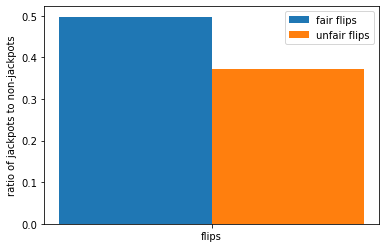

In [2]:
# creating a fair die and rolling 2 of them 1,000 times, then seeing how many jackpots occurred
fair = Die([1,2])
fair_game = Game([fair, fair])
fair_game.play(1000)
analyze_fair = Analyzer(fair_game)
analyze_fair = (analyze_fair.jackpot() / 1000)
# creating an unfair die, rolling two of them and one fair die 1,000 times, and seeing how many jackpots occurred
unfair = Die([1,2])
unfair.weight_change(1,5)
unfair_game = Game([unfair,unfair,fair])
unfair_game.play(1000)
analyze_unfair = Analyzer(unfair_game)
analyze_unfair = (analyze_unfair.jackpot() / 1000)
# plotting the ratios of jackpots (0 to 1) for the above two scenarios, seeing which had more jackpots
plt.bar('flips', analyze_fair, width=-0.4, align='edge', label='fair flips')
plt.bar('flips', analyze_unfair, width=0.4, align='edge', label='unfair flips')
plt.legend()
plt.ylabel('ratio of jackpots to non-jackpots');

----------------------------------------------------------------------------------------------------------------------------------------

## Scenario 2

In [3]:
# creating a fair die and 2 unfair dice
fair_1 = Die([1,2,3,4,5,6])
unfair_1 = Die([1,2,3,4,5,6])
unfair_2 = Die([1,2,3,4,5,6])
unfair_1.weight_change(6,5)
unfair_2.weight_change(1,5)
# playing a game with 5 fair dice 10,000 times
# analyzing the game to see how many jackpots and how many combos occurred
game_1 = Game([fair_1,fair_1,fair_1,fair_1,fair_1])
game_1.play(10000)
analyze_1 = Analyzer(game_1)
num_1 = analyze_1.jackpot()
rf_1 = num_1 / 10000
combo_1 = analyze_1.combo()
# playing a game with a predetermined combination of 5 of the above ^ dice 10,000 times
# analyzing the game to see how many jackpots and how many combos occurred
game_2 = Game([unfair_1,unfair_1,unfair_2,fair_1,fair_1])
game_2.play(10000)
analyze_2 = Analyzer(game_2)
num_2 = analyze_2.jackpot()
rf_2 = num_2 / 10000
combo_2 = analyze_2.combo()

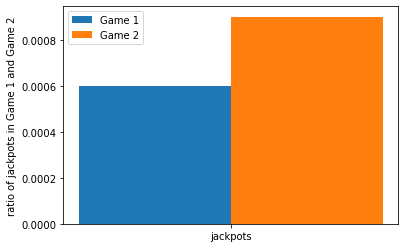

In [4]:
# plotting the occurrence of jackpots for each of the two scenarios above (as ratios 0-1)
plt.bar('jackpots', rf_1, width=-0.4, align='edge', label='Game 1')
plt.bar('jackpots', rf_2, width=0.4, align='edge', label='Game 2')
plt.legend()
plt.ylabel('ratio of jackpots in Game 1 and Game 2');

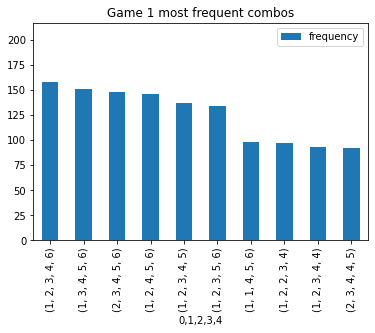

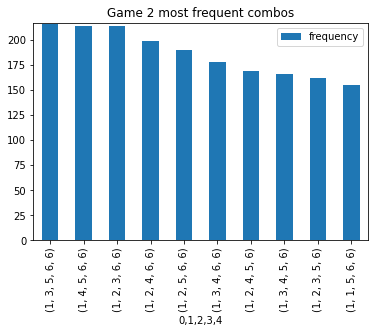

In [5]:
# finding what the max height should be for the following charts in order to make the y axis identical and proper
max_num = max(combo_1['frequency'].iloc[0],combo_2['frequency'].iloc[0])+1
# plotting, in 2 separate plots, the most frequent combos found in each scenario (as a bar graph)
combo_1_short = combo_1.head(10)
combo_plot_1 = combo_1_short.plot.bar(y='frequency', use_index=True, title="Game 1 most frequent combos", ylim=(0,max_num))
combo_2_short = combo_2.head(10)
combo_plot_2 = combo_2_short.plot.bar(y='frequency', use_index=True, title="Game 2 most frequent combos", ylim=(0,max_num))

----------------------------------------------------------------------------------------------------------------------------------------

## Scenario 3

In [6]:
# creating Die object with 26 faces for each letter
alphabet = Die(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])
# re-weighting each of the faces based on the given values
alphabet.weight_change(1,8.4966)
alphabet.weight_change(2,2.0720)
alphabet.weight_change(3,4.5388)
alphabet.weight_change(4,3.3844)
alphabet.weight_change(5,11.1607)
alphabet.weight_change(6,1.8121)
alphabet.weight_change(7,2.4705)
alphabet.weight_change(8,3.0034)
alphabet.weight_change(9,7.5448)
alphabet.weight_change(10,0.1965)
alphabet.weight_change(11,1.1016)
alphabet.weight_change(12,5.4893)
alphabet.weight_change(13,3.0129)
alphabet.weight_change(14,6.6544)
alphabet.weight_change(15,7.1635)
alphabet.weight_change(16,3.1671)
alphabet.weight_change(17,0.1962)
alphabet.weight_change(18,7.5809)
alphabet.weight_change(19,5.7351)
alphabet.weight_change(20,6.9509)
alphabet.weight_change(21,3.6308)
alphabet.weight_change(22,1.0074)
alphabet.weight_change(23,1.2899)
alphabet.weight_change(24,0.2902)
alphabet.weight_change(25,1.7779)
alphabet.weight_change(26,0.2722)

# creating a Game with 5 of the dice, and then playing it (rolling) 1000 times
alph_game = Game([alphabet,alphabet,alphabet,alphabet,alphabet])
alph_game.play(1000)
#analyze_alph = Analyzer(alph_game)
#alph_combos = analyze_alph.combo()

# creates list of the lists, with each internal list being the outcomes of a certain number of dice being rolled
ls = alph_game.show_results().values.tolist()
# makes this list into a series
dl = pd.Series((i for i in ls))
# creates new dataframe with the index column being the permutation and the other column being the number of times that permutation occurred (in decreasing order from top to bottom)
dl_ser = dl.value_counts()
df_ = pd.DataFrame({'permutations':dl_ser.index, 'frequency':dl_ser.values})
df_.set_index('permutations', inplace=True)
# returns the new combos dataframe
alph_combos = df_
alph_combos.head(50)

,frequency
permutations,
"[a, o, a, w, h]",1
"[t, h, r, a, s]",1
"[d, l, m, p, n]",1
"[h, a, c, z, k]",1
"[m, d, h, g, o]",1
"[d, b, w, z, t]",1
"[e, c, l, r, j]",1
"[a, g, w, r, w]",1
"[u, j, h, w, f]",1


Looking at first 50 combos (permutations) for amount of words that are English (each 'Try' is a rerun of the program):   
Try 1: 0/50   
Try 2: 0/50   
Try 3: 0/50   
Try 4: 0/50   
Try 5: 0/50   
Try 6: 0/50   
Try 7: 0/50   
Try 8: 0/50   
Try 9: 0 (0.5) / 50     ---  'sinez' was the word here and was the closest thing to English after 450 attempts   
Try 10: 0/50

Based on this information and an eyeball assumption, there will be a word close* to English 0.2% of the time (rel_freq = 0.002), but 0 real words will appear

Side note: there were several times that 2/3/4 letter words appeared before finding a 5 letter one